<a href="https://colab.research.google.com/github/davidpri1/CC-2-RMarkdown/blob/master/Copy_of_Copy_of_Star_Wars_TM_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May 21 08:10:02 2020

@author: dscholnick
"""

import requests
import json
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
import os
import glob as glob
from wordcloud import WordCloud, STOPWORDS

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()


# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 16.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=430c2a578adbe938a9ff688c34c4ac4134dc5845d9a6b4014adb0548257caac4
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=47253647443f0cd039530cf70820d4e287b47583923886e6bb9c80f6cd5383f8
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import nltk as nlp

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
#Load movies
movies = pd.read_csv('drive/My Drive/Colab Notebooks/starwarsmovies_edit_5.csv')

#Clean out white space before and after characters
movies.character = movies.character.str.strip()

#Check out characters
#print(movies['character'].unique())
#find out how many characters are there
#print(len(movies['character'].unique()))

#list dialogue of top 50 characters by times speaking
#movies.character.value_counts().iloc[:50]

#Find out is NAN values in 
#movies[movies.dialogue.isna()]#6465



In [0]:
########## Clean dialogue ###############
#strip whitespace
movies.dialogue = movies.dialogue.str.strip()

#movies['clean_dialogue'] = movies['dialogue']
#movies['clean_dialogue'] = movies['clean_dialogue'].replace(r'\\t',' ', regex=True)#remove \t
#movies['clean_dialogue'] = movies['clean_dialogue'].str.replace('\d+', '')#remove numbers
#movies['clean_dialogue'] = movies['clean_dialogue'].str.replace('[^\w\s]','')#remove punctuation

description_list=[]
for description in movies.dialogue:
    description=re.sub("[^a-zA-Z]", " ", description)
    descripiton=re.sub("[a-zA-Z]{4,}", " ", description)
    description=description.lower()
    description=nltk.word_tokenize(description)
    description=[word for word in description if not word in set(stopwords.words("english"))]
    lemma=nlp.WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in description]
    description=" ".join(description)
    description_list.append(description)

movies["clean_text"]=description_list
print(movies.clean_text.head())

0                         captain
1                         yes sir
2                 tell wish board
3                         yes sir
4    due respect trade federation
Name: clean_text, dtype: object


In [0]:
######### Create text files for top characters ###################

Luke_txt = movies[movies['character']=='LUKE']['clean_text'].values
Han_txt = movies[movies['character']=='HAN']['clean_text'].values
Anakin_txt = movies[movies['character']=='ANAKIN']['clean_text'].values
Finn_txt = movies[movies['character']=='FINN']['clean_text'].values
C3PO_txt = movies[movies['character']=='C3PO']['clean_text'].values
Obi_wan_txt = movies[movies['character']=='OBI-WAN']['clean_text'].values
Rey_txt = movies[movies['character']=='REY']['clean_text'].values
Poe_txt = movies[movies['character']=='Poe']['clean_text'].values
Leia_txt = movies[movies['character']=='Leia']['clean_text'].values
Padme_txt = movies[movies['character']=='PADME']['clean_text'].values
Qui_Gon_txt = movies[movies['character']=='QUI-GON']['clean_text'].values
Palpatine_txt = movies[movies['character']=='PALPATINE']['clean_text'].values
Vader_txt = movies[movies['character']=='VADER']['clean_text'].values
Yoda_txt = movies[movies['character']=='YODA']['clean_text'].values
Kylo_Ren_txt = movies[movies['character']=='KYLO REN']['clean_text'].values
Lando_txt = movies[movies['character']=='LANDO']['clean_text'].values
Jar_Jar_txt = movies[movies['character']=='JAR JAR']['clean_text'].values
Rose_txt = movies[movies['character']=='ROSE']['clean_text'].values
Bail_txt = movies[movies['character']=='BAIL']['clean_text'].values
Mace_txt =movies[movies['character']=='MACE']['clean_text'].values
GeneralHux_txt =movies[movies['character']=='GeneralHux']['clean_text'].values
#check
type(Luke_txt)

numpy.ndarray

In [0]:
############## Create list of top character text ###########################
char_text = [Luke_txt, Han_txt, Anakin_txt, Finn_txt, C3PO_txt, Obi_wan_txt,
                  Rey_txt, Poe_txt, Leia_txt, Padme_txt, Qui_Gon_txt, Palpatine_txt,
                  Vader_txt, Yoda_txt, Kylo_Ren_txt, Lando_txt, Rose_txt, GeneralHux_txt]
                  #, Bail_txt,Jar_Jar_txt, Mace_txt]

In [0]:
######### Create text files for top characters ###################

Luke= movies[movies['character']=='LUKE']['clean_text'].values
Han = movies[movies['character']=='HAN']['clean_text'].values
Anakin = movies[movies['character']=='ANAKIN']['clean_text'].values
Finn = movies[movies['character']=='FINN']['clean_text'].values
C3PO = movies[movies['character']=='C3PO']['clean_text'].values
Obi_Wan = movies[movies['character']=='OBI-WAN']['clean_text'].values
Rey = movies[movies['character']=='REY']['clean_text'].values
Poe = movies[movies['character']=='Poe']['clean_text'].values
Leia = movies[movies['character']=='Leia']['clean_text'].values
Padme = movies[movies['character']=='PADME']['clean_text'].values
Qui_Gon = movies[movies['character']=='QUI-GON']['clean_text'].values
Palpatine = movies[movies['character']=='PALPATINE']['clean_text'].values
Vader = movies[movies['character']=='VADER']['clean_text'].values
Yoda = movies[movies['character']=='YODA']['clean_text'].values
Kylo_Ren = movies[movies['character']=='KYLO REN']['clean_text'].values
Lando = movies[movies['character']=='LANDO']['clean_text'].values
Jar_Jar = movies[movies['character']=='JAR JAR']['clean_text'].values
Rose = movies[movies['character']=='ROSE']['clean_text'].values
Bail = movies[movies['character']=='BAIL']['clean_text'].values
NUTE = movies[movies['character']=='NUTE']['clean_text'].values
EMPEROR= movies[movies['character']=='EMPEROR']['clean_text'].values
REDLEADER= movies[movies['character']=='RED LEADER']['clean_text'].values
CAPTAINPANAKA= movies[movies['character']=='CAPTAIN PANAKA']['clean_text'].values
BIGGS= movies[movies['character']=='BIGGS']['clean_text'].values
GeneralHux = movies[movies['character']=='GeneralHux']['clean_text'].values
SHMI= movies[movies['character']=='SHMI']['clean_text'].values
STORMTROOPER= movies[movies['character']=='STORMTROOPER']['clean_text'].values
JANNAH= movies[movies['character']=='JANNAH']['clean_text'].values
WATTO= movies[movies['character']=='WATTO']['clean_text'].values
ZORII= movies[movies['character']=='ZORII']['clean_text'].values
TARKIN= movies[movies['character']=='TARKIN']['clean_text'].values
JABBA= movies[movies['character']=='JABBA']['clean_text'].values
OWEN= movies[movies['character']=='OWEN']['clean_text'].values
CREATURE= movies[movies['character']=='CREATURE']['clean_text'].values
MAZ= movies[movies['character']=='MAZ']['clean_text'].values
DJ= movies[movies['character']=='DJ']['clean_text'].values
GENERALGRIEVOUS= movies[movies['character']=='GENERAL GRIEVOUS']['clean_text'].values
TROOPER= movies[movies['character']=='TROOPER']['clean_text'].values
MACE = movies[movies['character']=='MACE']['clean_text'].values
DARTHSIDIOUS= movies[movies['character']=='DARTH SIDIOUS']['clean_text'].values
B= movies[movies['character']=='B']['clean_text'].values
BOSSNASS= movies[movies['character']=='BOSS NASS']['clean_text'].values
SNAP= movies[movies['character']=='SNAP']['clean_text'].values
ENRICPRYDE= movies[movies['character']=='ENRIC PRYDE']['clean_text'].values
MACE= movies[movies['character']=='MACE']['clean_text'].values
FN2187= movies[movies['character']=='FN2187']['clean_text'].values
OFFICER= movies[movies['character']=='OFFICER']['clean_text'].values
AMILYNHOLDO= movies[movies['character']=='AMILYN HOLDO']['clean_text'].values
FODEBEED= movies[movies['character']=='FODE/BEED']['clean_text'].values
SNOKE= movies[movies['character']=='SNOKE']['clean_text'].values


all_char_text = [Luke_txt, Han_txt, Anakin_txt, Finn_txt, C3PO_txt, Obi_wan_txt,
                  Rey_txt, Poe_txt, Leia_txt, Padme_txt, Qui_Gon_txt, Palpatine_txt,
                  Vader_txt, Yoda_txt, Kylo_Ren_txt, Lando_txt, Jar_Jar_txt,
                  Rose_txt, Bail_txt, NUTE, EMPEROR, CAPTAINPANAKA, BIGGS, ARMITAGEHUX,
                 SHMI, STORMTROOPER, JANNAH, WATTO, ZORII, TARKIN, JABBA, OWEN, 
                 CREATURE, MAZ, DJ, GENERALGRIEVOUS, TROOPER, MACEWINDU, DARTHSIDIOUS,
                 B, BOSSNASS, SNAP, ENRICPRYDE, MACE,FN2187, OFFICER, AMILYNHOLDO,
                 FODEBEED, SNOKE]
#check
#print(Luke_txt[3])

# LDA



In [0]:
######### Tokenize and Clean-up using gensim’s simple_preprocess #################
def sent_to_words(SW_text):
    for text in SW_text:
        yield(gensim.utils.simple_preprocess(str(text), deacc=True))  # deacc=True removes punctuations

data_words1 = list(sent_to_words(char_text))

print(data_words1[:1])

[['hurry', 'come', 'waiting', 'get', 'gear', 'shape', 'guy', 'biggs', 'know', 'back', 'get', 'academy', 'change', 'much', 'back', 'soon', 'hey', 'happened', 'get', 'commission', 'almost', 'forgot', 'battle', 'going', 'right', 'system', 'come', 'look', 'lot', 'firing', 'earlier', 'hey', 'easy', 'cut', 'power', 'shut', 'afterburner', 'came', 'low', 'deak', 'trail', 'close', 'thought', 'going', 'fry', 'instrument', 'busted', 'skyhopper', 'pretty', 'bad', 'uncle', 'owen', 'pretty', 'upset', 'grounded', 'rest', 'season', 'fantastic', 'look', 'talking', 'around', 'giant', 'starship', 'beginning', 'sound', 'like', 'uncle', 'gotten', 'soft', 'city', 'well', 'thing', 'since', 'left', 'biggs', 'quiet', 'talking', 'join', 'rebellion', 'kidding', 'sorry', 'quiet', 'listen', 'quiet', 'barely', 'hear', 'around', 'forever', 'trying', 'find', 'stuck', 'likely', 'cancel', 'application', 'lot', 'unrest', 'among', 'sand', 'people', 'since', 'left', 'even', 'raided', 'outskirt', 'anchorhead', 'know', 'got

In [0]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
char_data = lemmatization(data_words1, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(char_data[:2])

['hurry come wait gear shape guy know back get academy change much back soon happen get almost forget battle go right system come look lot fire earlier easy cut power come low deak trail close think go instrument bust skyhopper pretty bad uncle owen pretty upset ground rest season fantastic look talk giant starship beginning sound uncle get soft city thing leave biggs quiet talking join rebellion kid sorry quiet listen quiet barely hear around forever try find stuck likely cancel application lot unrest sand people leave even raid outskirt anchorhead know get enough vaporator go make place pay need season leave say go go around long guess see well academy next season know draft imperial starfleet sure take care always good friend get look much choice remind go toshi station pick power converter right come red one come well come red let go unit bad motivator look take away let go fair biggs never gon well alter time speed harvest teleport rock well bright universe planet farth call get l

In [0]:
###### Vectorize #######
#Add in extra stop words
from sklearn.feature_extraction import text 
additional_SW = [ 'know', 'come', 'need', 'really', 'like', 'think', 'make',
                 'thing', 'want', 'time', 'help', 'tell', 'look', 'ship',
                'little', 'stay', 'wait' , 'good']
SW = text.ENGLISH_STOP_WORDS.union(additional_SW)

CV2=CountVectorizer(input="content" 
                    , min_df= 5
                    , max_df = 100
                   #, lowercase = True
                   #, tokenizer = lemmatize_text
                   #, ngram_range = (1,3)
                    , stop_words = SW
                   #, stop_words = 'english'
                   , token_pattern='[a-zA-Z]{4,}'
                   )

DTM_2 = CV2.fit_transform(char_data)  # create a sparse matrix
print(type(DTM_2))
#vocab is a vocabulary list
vocab2 = CV2.get_feature_names()  # change to a list
# Convert to a regular array
print(list(vocab2)[10:20])
ColumnNames2=CV2.get_feature_names()
DF2 =pd.DataFrame(DTM_2.toarray(), columns=ColumnNames2)
#print(DF2.head())


<class 'scipy.sparse.csr.csr_matrix'>
['apart', 'arrive', 'artoo', 'attack', 'attention', 'away', 'balance', 'base', 'battle', 'beautiful']


In [0]:
SW_lda = LatentDirichletAllocation(n_components=12 
                                         ,max_iter=100
                                         ,learning_decay = .9
                                         ,learning_method='online'
                                         #,random_state = 66
                                   )
#fit model
SW_LDA = SW_lda.fit_transform(DTM_2)

#check it out
print("SIZE: ", SW_LDA.shape)  # (10, 6)

# See model parameters
pprint(SW_lda.get_params())



SIZE:  (18, 12)
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.9,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 100,
 'mean_change_tol': 0.001,
 'n_components': 12,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [0]:
######### Log Likelyhood: Higher the better #################3
print("Log Likelihood: ", SW_lda.score(DTM_2))

######### Perplexity: Lower the better  ####################
#Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", SW_lda.perplexity(DTM_2))

#print(My_lda_model.components_)



Log Likelihood:  -30493.639882320105
Perplexity:  298.7914302812146


In [0]:
pyLDAvis.enable_notebook()
panel1 = pyLDAvis.sklearn.prepare(SW_lda, DTM_2, CV2, mds='tsne')
panel1

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9        5.310529  171.049652       1        1  61.844511
0      136.304657   23.800941       2        1  23.952617
7      101.190552  -84.985191       3        1  13.979505
11    -106.824867  148.841736       4        1   0.024819
3      -44.365761   78.632721       5        1   0.024819
6       43.884090   73.474022       6        1   0.024819
5      114.093971  135.933029       7        1   0.024819
8     -119.727142  -72.077179       8        1   0.024819
1      -49.518208   -9.617325       9        1   0.024819
4     -141.938736   40.055210      10        1   0.024819
10      38.731544  -14.776019      11        1   0.024819
2      -10.944340 -107.193344      12        1   0.024819, topic_info=       Term        Freq       Total Category  logprob  loglift
12    artoo   68.000000   68.000000  Default  30.0000  30.0000
104   force   86.000000   86.000000  Default  29.0000  29.0000
165  master   57.000000   57.000000  Default  28.0000  28.0000
228   right  126.000000  126.000000  Default  27.0000  27.0000
94     feel   64.000000   64.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
196   point    0.004449   20.952424  Topic12  -5.6985  -0.1559
5     alive    0.004433   14.913571  Topic12  -5.7022   0.1804
300  weapon    0.004436   19.790586  Topic12  -5.7016  -0.1020
121  happen    0.004407   47.024720  Topic12  -5.7082  -0.9740
176  moment    0.004394   15.047626  Topic12  -5.7110   0.1627

[815 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.788430      able
0         2  0.157686      able
1         1  0.139087  actually
1         2  0.417260  actually
1         3  0.417260  actually
...     ...       ...       ...
310       2  0.072686     wrong
310       3  0.181714     wrong
311       1  0.845638      year
311       3  0.076876      year
312       1  0.993428     young

[630 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 8, 12, 4, 7, 6, 9, 2, 5, 11, 3])

In [0]:
## implement a print function  that prints top 10 tokens with weights for each
## REF: https://nlpforhackers.io/topic-modeling/
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order
    

####### call the function above with our model and CV
print_topics(SW_lda, CV2)


Topic:   0
[('force', 55.644117250924786), ('kill', 47.732181358337755), ('feel', 41.134828735148744), ('power', 38.48558679842493), ('dark', 34.36159245454268), ('strong', 28.344464358479783), ('master', 27.686408156983205), ('destroy', 26.508006089504043), ('leave', 26.376647676099694), ('order', 21.159841040827118)]
Topic:   1
[('right', 0.12500063800350134), ('artoo', 0.12500050250349326), ('anakin', 0.1250004742240056), ('thank', 0.12500045068087212), ('love', 0.12500038742925731), ('sure', 0.12500038290028448), ('friend', 0.12500037966413613), ('believe', 0.1250003766957713), ('hope', 0.1250003643448622), ('leave', 0.12500035812049187)]
Topic:   2
[('right', 39.64229702692558), ('chewie', 36.15920580534305), ('order', 24.97713204630739), ('leave', 18.88614362593492), ('stop', 16.281838833750903), ('resistance', 14.641650724964128), ('thank', 14.28149050769795), ('long', 13.628877206955266), ('people', 12.582096163758997), ('fleet', 11.874835589429406)]
Topic:   3
[('force', 23.62

In [0]:

######################################################
######### Dominant Topic in Each Document #############
######################################################

# Create Document - Topic Matrix
lda_output_1 = SW_lda.transform(DTM_2)

# column names
topicnames = ["Topic" + str(i) for i in range(SW_lda.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(18)]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output_1, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics1 = df_document_topic.head(18).style.applymap(color_green).applymap(make_bold)
#df_document_topics(color_green).applymap(make_bold)
df_document_topics1

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,dominant_topic
Doc0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11
Doc1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11
Doc2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11
Doc3,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,11
Doc4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11
Doc5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11
Doc6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11
Doc7,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0
Doc8,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0
Doc9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11


In [0]:
###################################################
###### Find Best Parameters for Model #############

# Define Search Param
search_params = {'n_components': [2, 3, 5, 7 ], 'learning_decay': [.5, .7, .9]}

# Init the Model
best_lda_1 = LatentDirichletAllocation()

# Init Grid Search Class
model_1 = GridSearchCV(best_lda_1, param_grid=search_params)

# Do the Grid Search
model_1.fit(DTM_2)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [0]:
######## Best Topic Model and Parameters############

# Best Model
best_lda_model_1 = model_1.best_estimator_

# Model Parameters
print("Best Model's Params: ", model_1.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model_1.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model_1.perplexity(DTM_2))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 2}
Best Log Likelihood Score:  -6233.471280523494
Model Perplexity:  263.2691986202833


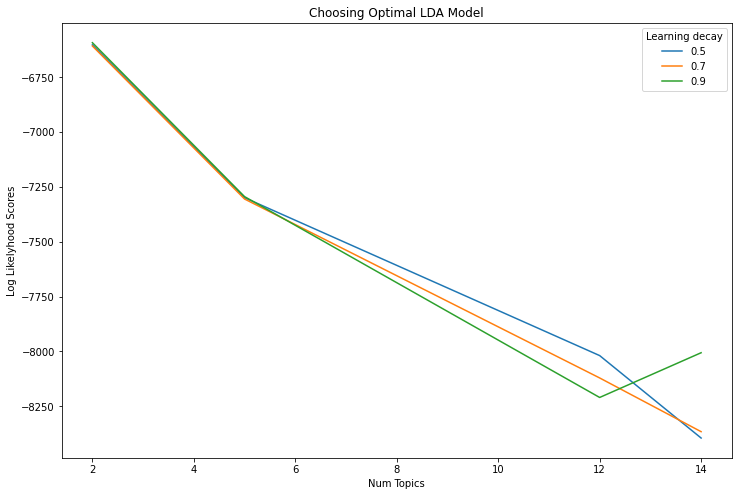

In [0]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [2, 5, 12, 14 ]

log_likelyhoods_5 = [round(model_1.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model_1.cv_results_['params']) if gscore['learning_decay']==0.5]
log_likelyhoods_7 = [round(model_1.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model_1.cv_results_['params']) if gscore['learning_decay']==0.7]
log_likelyhoods_9 = [round(model_1.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model_1.cv_results_['params']) if gscore['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [0]:
######################################################
######### Dominant Topic in Each Document #############
######################################################

# Create Document - Topic Matrix
lda_output_1 = lda_model.transform(DTM_2)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model_1.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(19)]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output_1, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics1 = df_document_topic.head(19).style.applymap(color_green).applymap(make_bold)
#df_document_topics(color_green).applymap(make_bold)
df_document_topics1
df_document_topcs.Topic0

NameError: ignored

In [0]:
########### Dominant topics in each document #################
# Topic-Keyword Matrix
df_topic_kw = pd.DataFrame(best_lda_model_1.components_)

# Assign Column and Index
df_topic_kw.columns = CV2.get_feature_names()
df_topic_kw.index = ["Topic" + str(i) for i in range(best_lda_model_1.n_components)]

# View
df_topic_kw.head()

,able,actually,afraid,agree,ahead,alive,allow,ally,anakin,anger,apart,arrive,attack,away,balance,base,battle,beautiful,begin,believe,belong,best,blast,blow,board,break,bring,build,capture,care,careful,carry,catch,certain,chance,change,charge,check,choice,choose,...,sure,talk,teach,terrible,test,thank,today,track,train,training,traitor,transmission,transport,trap,troop,trouble,true,trust,truth,turn,understand,unit,upset,vader,view,watch,weak,weapon,welcome,wise,wish,wonder,word,work,world,worry,worth,wrong,year,young
Topic0,9.907843,6.470069,26.663364,15.003182,14.262331,5.765666,4.682424,1.715446,1.588528,0.563718,4.117043,4.236578,10.66005,34.302106,4.216644,11.001486,12.72114,7.429567,7.579013,18.971154,10.171092,6.403848,18.389514,11.458082,7.223324,4.212499,24.529701,9.234214,6.250583,25.658023,9.360975,3.680725,5.354718,1.477694,11.03878,8.730054,8.649386,14.188882,9.217738,0.54898,...,41.596041,31.40356,0.702247,5.848239,1.819092,41.474177,5.138611,13.444486,2.237193,3.016814,5.636641,4.127884,7.063899,8.058013,6.046904,24.861772,13.38322,13.191163,5.119592,38.794099,14.858466,14.655862,6.536421,7.602775,1.261091,20.043586,2.792245,14.211761,7.123416,3.33687,7.891001,9.975984,6.346961,27.076832,2.374236,25.437997,5.82573,26.316366,6.822692,0.540871
Topic1,10.092157,0.529931,9.336636,4.996818,0.737669,10.234334,8.317576,4.284554,39.411472,9.436282,1.882957,2.763422,6.33995,2.697894,5.783356,1.998514,1.27886,0.570433,8.420987,9.028846,0.828908,2.596152,0.610486,0.541918,2.776676,5.787501,14.470299,0.765786,1.749417,2.341977,6.639025,2.319275,1.645282,5.522306,1.96122,3.269946,2.350614,2.811118,4.782262,10.45102,...,9.403959,0.59644,12.297753,4.151761,6.180908,4.525823,4.861389,0.555514,31.762807,16.983186,3.363359,6.872116,2.936101,0.941987,5.953096,1.138228,14.61678,9.808837,6.880408,8.205901,7.141534,2.344138,1.463579,12.397225,8.738909,3.956414,8.207755,4.788239,1.876584,4.66313,2.108999,2.024016,5.653039,3.923168,3.625764,2.562003,1.17427,2.683634,7.177308,12.459129


############Review topics distribution across documents #################

df_topic_distribution_1 = df_document_topics1['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution_1.columns = ['Topic Num', 'Num Documents']
df_topic_distribution_1

In [0]:
pyLDAvis.enable_notebook()
panel1 = pyLDAvis.sklearn.prepare(best_lda_model_1, DTM_2, CV2, mds='tsne')
panel1

NameError: ignored

In [0]:
####### Top 15 keywords for each topic ###########

# Show top n keywords for each topic
def show_topics(vectorizer=CV2, lda_model=best_lda_model_1, n_words=12):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=CV2, lda_model=best_lda_model_1, n_words=12)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11
Topic 0,force,kill,dark,feel,power,anakin,strong,ship,master,train,destroy,leave
Topic 1,ship,wait,artoo,leave,chewie,sure,droid,thank,stop,friend,turn,order


Mallet Topic Modeling


In [0]:
############### Prep data for Mallet ####################

#packages for gensim

#Run in python console
import nltk; nltk.download('stopwords')
# NLTK Stop words
from nltk.corpus import stopwords


# Run in terminal or command prompt
#python3 -m spacy download en

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Add stop words and extras
stop_words = stopwords.words('english')
stop_words.extend(['know', 'come', 'need', 'really', 'like', 'think', 'make',
                 'thing', 'want', 'time', 'help', 'tell', 'look',
                'little', 'stay', 'good'])

In [0]:
#Check data
#pprint(All_text[:1])
#type(All_text)

In [0]:
############ Tokenize words and Clean-up text #######################

#tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

char_clean_text = list(sent_to_words(char_text))
print(char_clean_text[:1])

[['hurry', 'come', 'waiting', 'get', 'gear', 'shape', 'guy', 'biggs', 'know', 'back', 'get', 'academy', 'change', 'much', 'back', 'soon', 'hey', 'happened', 'get', 'commission', 'almost', 'forgot', 'battle', 'going', 'right', 'system', 'come', 'look', 'lot', 'firing', 'earlier', 'hey', 'easy', 'cut', 'power', 'shut', 'afterburner', 'came', 'low', 'deak', 'trail', 'close', 'thought', 'going', 'fry', 'instrument', 'busted', 'skyhopper', 'pretty', 'bad', 'uncle', 'owen', 'pretty', 'upset', 'grounded', 'rest', 'season', 'fantastic', 'look', 'talking', 'around', 'giant', 'starship', 'beginning', 'sound', 'like', 'uncle', 'gotten', 'soft', 'city', 'well', 'thing', 'since', 'left', 'biggs', 'quiet', 'talking', 'join', 'rebellion', 'kidding', 'sorry', 'quiet', 'listen', 'quiet', 'barely', 'hear', 'around', 'forever', 'trying', 'find', 'stuck', 'likely', 'cancel', 'application', 'lot', 'unrest', 'among', 'sand', 'people', 'since', 'left', 'even', 'raided', 'outskirt', 'anchorhead', 'know', 'got

In [0]:
#Creating Bigram and Trigram Models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(char_clean_text, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[char_clean_text], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Check trigram example
print(trigram_mod[bigram_mod[char_clean_text[0]]])




/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['hurry', 'come', 'waiting', 'get', 'gear', 'shape', 'guy', 'biggs', 'know', 'back', 'get', 'academy', 'change', 'much', 'back', 'soon', 'hey', 'happened', 'get', 'commission', 'almost', 'forgot', 'battle', 'going', 'right', 'system', 'come', 'look', 'lot', 'firing', 'earlier', 'hey', 'easy', 'cut', 'power', 'shut', 'afterburner', 'came', 'low', 'deak', 'trail', 'close', 'thought', 'going', 'fry', 'instrument', 'busted', 'skyhopper', 'pretty', 'bad', 'uncle_owen', 'pretty', 'upset', 'grounded', 'rest', 'season', 'fantastic', 'look', 'talking', 'around', 'giant', 'starship', 'beginning', 'sound', 'like', 'uncle', 'gotten', 'soft', 'city', 'well', 'thing', 'since', 'left', 'biggs', 'quiet', 'talking', 'join', 'rebellion', 'kidding', 'sorry', 'quiet', 'listen', 'quiet', 'barely', 'hear', 'around', 'forever', 'trying', 'find', 'stuck', 'likely', 'cancel', 'application', 'lot', 'unrest', 'among', 'sand_people', 'since', 'left', 'even', 'raided', 'outskirt', 'anchorhead', 'know', 'got', 'eno

In [0]:
########### Remove Stopwords, Make Bigrams and Lemmatize #################

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [0]:
########### run the functions for stopwords, bigrams and lemmatizer ###################


# Remove Stop Words
char_text_nostops = remove_stopwords(char_clean_text)

# Form Bigrams
char_text_bigrams = make_bigrams(char_text_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])
nlp.max_length = 2500000

# Do lemmatization keeping only noun, adj, vb, adv
char_text_lemmatized = lemmatization(char_text_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#check
print(char_text_lemmatized[:1])

[['hurry', 'wait', 'gear', 'shape', 'guy', 'back', 'get', 'academy', 'change', 'much', 'back', 'soon', 'happen', 'get', 'almost', 'forget', 'battle', 'go', 'right', 'system', 'lot', 'fire', 'earlier', 'easy', 'cut', 'power', 'come', 'low', 'deak', 'trail', 'close', 'think', 'go', 'instrument', 'bust', 'skyhopper', 'pretty', 'bad', 'uncle_owen', 'pretty', 'upset', 'ground', 'rest', 'season', 'fantastic', 'talk', 'giant', 'starship', 'begin', 'uncle', 'get', 'soft', 'city', 'well', 'leave', 'biggs', 'quiet', 'talking', 'join', 'rebellion', 'kid', 'sorry', 'quiet', 'listen', 'quiet', 'barely', 'hear', 'around', 'forever', 'try', 'find', 'stuck', 'likely', 'cancel', 'application', 'lot', 'unrest', 'leave', 'even', 'raid', 'outskirt', 'anchorhead', 'get', 'enough', 'vaporator', 'go', 'place', 'pay', 'season', 'leave', 'say', 'go', 'go', 'around', 'long', 'guess', 'see', 'well', 'academy', 'next', 'season', 'draft', 'imperial', 'starfleet', 'sure', 'take', 'care', 'always', 'good', 'friend',

In [0]:
type(char_text_lemmatized)
#clean_text_lemmatized

list

In [0]:
########## Create the Dictionary and Corpus needed for Topic Modeling ###############

# Create Dictionary
id2word_1 = corpora.Dictionary(char_text_lemmatized)

# Create Corpus
txts_1= char_text_lemmatized

# Term Document Frequency
corpus_1 = [id2word_1.doc2bow(txt) for txt in txts_1]

# Check
print(corpus_1[:1])
#check individual word
id2word_1[50]

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 2), (9, 2), (10, 3), (11, 4), (12, 1), (13, 2), (14, 1), (15, 1), (16, 5), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 12), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 6), (34, 22), (35, 8), (36, 3), (37, 1), (38, 1), (39, 2), (40, 2), (41, 1), (42, 4), (43, 1), (44, 4), (45, 1), (46, 3), (47, 3), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 5), (55, 4), (56, 1), (57, 6), (58, 2), (59, 1), (60, 1), (61, 6), (62, 2), (63, 3), (64, 1), (65, 1), (66, 5), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 2), (73, 2), (74, 2), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 5), (81, 2), (82, 1), (83, 1), (84, 1), (85, 2), (86, 3), (87, 1), (88, 1), (89, 3), (90, 2), (91, 1), (92, 3), (93, 1), (94, 2), (95, 1), (96, 4), (97, 1), (98, 1), (99, 1), (100, 14), (101, 1), (102, 1), (103, 1), (104, 2), (105, 1), (106, 1), (107, 1), (108, 2), (109, 2), (110,

'best'

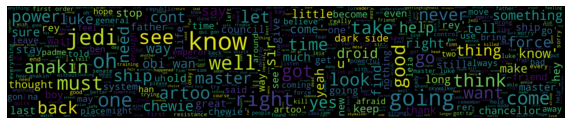

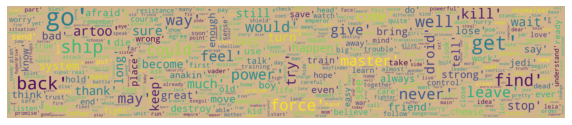

In [0]:
############ create word cloud after creating corpus #################
from wordcloud import WordCloud, STOPWORDS

#Before Cleaning
char_words = ','.join(map(str, char_text))
wordcloud_before = WordCloud(background_color='black', width=2500, height=500,
                     stopwords = None, max_words = 500,max_font_size=110).generate(char_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_before, interpolation="bilinear")
plt.axis('off')
plt.show()

#After Cleaning
char_words = ','.join(map(str, char_text_lemmatized))
wordcloud_before = WordCloud(background_color='tan', width=2500, height=500,
                     stopwords = None, max_words = 500,max_font_size=110).generate(char_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_before, interpolation="bilinear")
plt.axis('off')
plt.show()


MALLET LDA

In [0]:
######## RUN ANALYSIS WITH MALLET ################

########## #install java to install mallet ################

def install_java_jdk():
  !apt-get install -y openjdk-8-jdk-headlines - qq > /dev/null
  os.environ["Java_Home"] = "usr.lib.jvm/java-8-openjdk-amd64"
  !java - version 

  install_java_jkd()

In [0]:
######### install mallet ############################
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [0]:
#Mallet LDA model
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path ='/content/mallet-2.0.8/bin/mallet'
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_1, num_topics=8, id2word=id2word_1)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# Show Topics
pprint(lda_mallet.show_topics(formatted=False))

[(0,
  [('ship', 0.04923599320882852),
   ('long', 0.04159592529711375),
   ('ready', 0.02631578947368421),
   ('find', 0.02631578947368421),
   ('destroy', 0.025466893039049237),
   ('control', 0.025466893039049237),
   ('watch', 0.017826825127334467),
   ('fighter', 0.016129032258064516),
   ('pull', 0.015280135823429542),
   ('power', 0.015280135823429542)]),
 (1,
  [('sir', 0.035908596300326445),
   ('artoo', 0.031556039173014146),
   ('afraid', 0.020674646354733407),
   ('wait', 0.01958650707290533),
   ('leia', 0.018498367791077257),
   ('message', 0.017410228509249184),
   ('dear', 0.017410228509249184),
   ('mission', 0.015233949945593036),
   ('find', 0.014145810663764961),
   ('short', 0.014145810663764961)]),
 (2,
  [('kill', 0.04677914110429448),
   ('feel', 0.04217791411042945),
   ('power', 0.04141104294478527),
   ('save', 0.023006134969325152),
   ('bring', 0.023006134969325152),
   ('leave', 0.02223926380368098),
   ('end', 0.01763803680981595),
   ('die', 0.0161042944

In [0]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=char_text_lemmatized, dictionary=id2word_1, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.36514464991076445


In [0]:
##### VIS for Mallet

##### Convert mallet to gensim for pyLDAvis
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)

#pyLDAvis.enable_notebook()
import pyLDAvis.gensim
vis_mallet = pyLDAvis.gensim.prepare(model, corpus_1, id2word_1)
pyLDAvis.display(vis_mallet)

In [0]:
4############ optimal number of topics ##############

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_1, num_topics=num_topics, id2word=id2word_1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values



In [0]:
################### Find most coherent model in Mallet ##################
#Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word_1, corpus=corpus_1, texts=char_text_lemmatized, start=8, limit=22, step=2 )

NameError: ignored

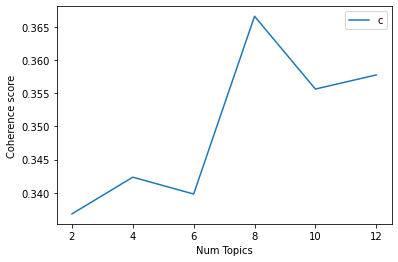

In [0]:
# Show graph
limit= 14; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 8  has Coherence Value of 0.3563
Num Topics = 10  has Coherence Value of 0.3549
Num Topics = 12  has Coherence Value of 0.3574
Num Topics = 14  has Coherence Value of 0.3465
Num Topics = 16  has Coherence Value of 0.334
Num Topics = 18  has Coherence Value of 0.3457


In [0]:
# Select the model and print the topics
optimal_model_1 = model_list[0]
model_topic = optimal_model_1.show_topics(formatted=False)
pprint(optimal_model_1.print_topics(num_words=10))

[(0,
  '0.018*"force" + 0.015*"power" + 0.013*"feel" + 0.013*"master" + '
  '0.012*"kill" + 0.009*"turn" + 0.009*"happen" + 0.009*"find" + '
  '0.008*"destroy" + 0.008*"bring"'),
 (1,
  '0.023*"back" + 0.019*"ship" + 0.016*"wait" + 0.012*"artoo" + 0.010*"leave" '
  '+ 0.009*"move" + 0.009*"bad" + 0.009*"find" + 0.008*"chewie" + '
  '0.008*"stop"')]


In [0]:
# 1. Wordcloud of Top N words in each topic

import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model_1.show_topics(formatted=False)

fig, axes = plt.subplots(2,6, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [0]:
############# Finding dominant topic in each document #####################
def format_topics_sentences(ldamodel=lda_mallet, corpus=corpus_1, texts=char_text_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()
    topic_num =2

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=corpus_1, texts= char_text_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_colwidth', -1)
# Show
#print(df_dominant_topic)#.head()
print(df_dominant_topic.Document_No)
print(df_dominant_topic.Dominant_Topic)
print(df_dominant_topic.Topic_Perc_Contrib)
print(df_dominant_topic.Keywords)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


0     0 
1     1 
2     2 
3     3 
4     4 
5     5 
6     6 
7     7 
8     8 
9     9 
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
Name: Document_No, dtype: int64
0     5.0
1     3.0
2     4.0
3     6.0
4     1.0
5     7.0
6     6.0
7     0.0
8     0.0
9     4.0
10    4.0
11    2.0
12    2.0
13    7.0
14    2.0
15    0.0
16    6.0
17    0.0
Name: Dominant_Topic, dtype: float64
0     0.3576
1     0.3939
2     0.3982
3     0.4396
4     0.4898
5     0.2644
6     0.2807
7     0.1250
8     0.1250
9     0.3439
10    0.3277
11    0.4072
12    0.2937
13    0.5197
14    0.3278
15    0.3632
16    0.4029
17    0.3468
Name: Topic_Perc_Contrib, dtype: float64
0     back, wait, droid, hear, turn, move, place, care, listen, father        
1     bad, chewie, kid, friend, worry, lot, hold, big, hit, idea              
2     master, jedi, hope, artoo, happen, boy, head, war, trust, love          
3     ship, find, stop, back, system, poe, leave, run, send, resistance      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [0]:
############### most representative document for each topic #############
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', -1)
#pd.reset_option('^display.', silent=True)
# Show
print(sent_topics_sorteddf_mallet)#.head(35)

   Topic_Num  Topic_Perc_Contrib  \
0  0.0        0.3632               
1  1.0        0.4898               
2  2.0        0.4072               
3  3.0        0.3939               
4  4.0        0.3982               
5  5.0        0.3576               
6  6.0        0.4396               
7  7.0        0.5197               

                                                                   Keywords  \
0  ship, long, ready, find, destroy, control, watch, fighter, pull, power     
1  sir, artoo, afraid, wait, leia, message, dear, mission, find, short        
2  kill, feel, power, save, bring, leave, end, die, true, death               
3  bad, chewie, kid, friend, worry, lot, hold, big, hit, idea                 
4  master, jedi, hope, artoo, happen, boy, head, war, trust, love             
5  back, wait, droid, hear, turn, move, place, care, listen, father           
6  ship, find, stop, back, system, poe, leave, run, send, resistance          
7  force, strong, anakin, train, learn, pow

In [0]:
################ Topic distribution across documents #####################

#understand the volume and distribution of topics in order to judge how widely it was discussed. The below table exposes that information.

# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
# Set it to None to display all columns in the dataframe
pd.set_option('display.width', None)
# Show
df_dominant_topics


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,5.0,"back, wait, droid, hear, turn, move, place, care, listen, father",4.0,0.2222
1.0,3.0,"bad, chewie, kid, friend, worry, lot, hold, big, hit, idea",1.0,0.0556
2.0,4.0,"master, jedi, hope, artoo, happen, boy, head, war, trust, love",3.0,0.1667
3.0,6.0,"ship, find, stop, back, system, poe, leave, run, send, resistance",1.0,0.0556
4.0,1.0,"sir, artoo, afraid, wait, leia, message, dear, mission, find, short",3.0,0.1667
5.0,7.0,"force, strong, anakin, train, learn, powerful, fear, lose, great, friend",1.0,0.0556
6.0,6.0,"ship, find, stop, back, system, poe, leave, run, send, resistance",3.0,0.1667
7.0,0.0,"ship, long, ready, find, destroy, control, watch, fighter, pull, power",2.0,0.1111
8.0,0.0,"ship, long, ready, find, destroy, control, watch, fighter, pull, power",NaN,NaN
9.0,4.0,"master, jedi, hope, artoo, happen, boy, head, war, trust, love",NaN,NaN


In [0]:
#####VIS for Mallet

##### Convert mallet to gensim for pyLDAvis
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model_1)

#pyLDAvis.enable_notebook()
import pyLDAvis.gensim
vis_mallet = pyLDAvis.gensim.prepare(model, corpus_1, id2word_1)
pyLDAvis.display(vis_mallet)

In [0]:
#Heatmap with plotly
import plotly.graph_objects as go
import numpy as np

# Build the rectangles as a heatmap
# specify the edges of the heatmap squares
phi = (1 + np.sqrt(5) )/2. # golden ratio
xe = [0, 1, 1+(1/(phi**4)), 1+(1/(phi**3)), phi]
ye = [0, 1/(phi**3), 1/phi**3+1/phi**4, 1/(phi**2), 1]

z = [ [1,1,1,1],
      [2,2,2,5],
      [3,3,3,5],
      [4,4,6,7],
      [1,1,8],
      ]
    

fig = go.Figure(data=go.Heatmap(
          x = np.sort(xe),
          y = np.sort(ye),
          z = z,
          type = 'heatmap',
          colorscale = 'Viridis'))

axis_template = dict(range = [0,1.6], autorange = False,
             showgrid = False, zeroline = False,
             linecolor = 'black', showticklabels = False,
             ticks = '' )

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    xaxis = axis_template,
    yaxis = axis_template,
    showlegend = False,
    width = 700, height = 700,
    autosize = False )

fig.show()


In [0]:

import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                    z=[[4,4,4,4],
      [1,1,1],
      [1,1,1,],
      [1,1,1],
      [1,1],
      [1],
      [1],
      [1]]))
fig.show()
